# Connecting to API for Collecting Flights Data in Florida USA

## Introduction:

This Jupyter Notebook aims to collect data on airports in Florida, USA using web scraping techniques. In the context of our SQL database project for airport management.

Web scraping will allow us to extract relevant data from OpenSky API, https://github.com/openskynetwork/opensky-api. This data will include details about the flights in Central America.

## Objectives:

1. Obtain data of flights in Florida, USA from the OpenSky API, https://github.com/openskynetwork/opensky-api 
2. Extract key information, such as schedule of flight, airline of the flight, and airport details.
3. Store the collected data in a suitable format for further analysis and use in a SQL database.

## Libraries

* **Pandas**: Pandas is an essential library for structuring and manipulating extracted data. It allows users to create DataFrames to organize data into rows and columns, facilitating operations such as cleaning, filtering, and processing.
* **opensky_api**: API of OpenSky

## References 

Bringing up OpenSky: A large-scale ADS-B sensor network for research
Matthias Schäfer, Martin Strohmeier, Vincent Lenders, Ivan Martinovic, Matthias Wilhelm
ACM/IEEE International Conference on Information Processing in Sensor Networks, April 2014

## Importing Libraries

In this section, we will introduce the code that utilizes the pandas library and the OpenSky API. To ensure proper installation of the OpenSky API library, we'll start by cloning the GitHub repository mentioned earlier. Additionally, we'll leverage the `os` module to manage the current working directory, ensuring we can easily navigate to the library directory for installation.


In [1]:
import os

In [2]:
# Get the current working directory
current_directory = os.getcwd()

target_directory = os.path.abspath(os.path.join(current_directory, *[os.pardir] * 2))

# Change the current working directory
os.chdir(target_directory)

# Change to a directory named "opensky-api" in the current working directory
os.chdir("opensky/python")

#Installing the OpenSky API
!pip install -e .

Obtaining file:///Users/manriquecamacho/Library/CloudStorage/OneDrive-UniversidaddeCostaRica/GitHub/opensky/python
  Preparing metadata (setup.py) ... done
  Attempting uninstall: opensky-api
    Found existing installation: opensky-api 1.3.0
    Uninstalling opensky-api-1.3.0:
      Successfully uninstalled opensky-api-1.3.0
  Running setup.py develop for opensky-api


In [3]:
#Change the current working directory
os.chdir(target_directory)

#Change back to the repo
os.chdir("AeroDB") 

In [3]:
#Importing Libraries

from opensky_api import OpenSkyApi #Importing the API 
import pandas as pd
import re
import numpy as np
import time

In [22]:
api = OpenSkyApi()

## Managing API Information

## Utilizing OpenSky API Functions

In this section, we will make use of functions from the OpenSky API to retrieve valuable flight data. These functions include capabilities such as retrieving arrivals and departures for specific airports within defined time intervals.

Please refer to the provided screenshot for details on the specific functions (`get_arrivals_by_airport` and `get_departures_by_airport`). The functions allow us to gather comprehensive flight information, aiding our analysis.

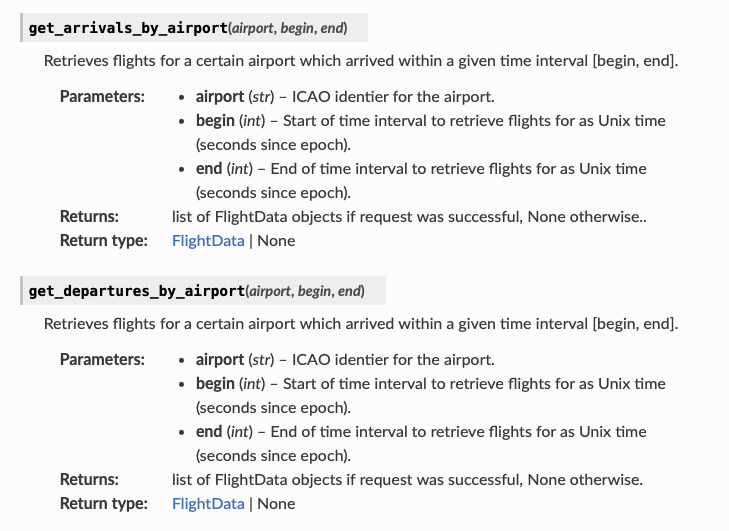

Furthermore, we will complement our data collection by importing a database of airports containing their respective ICAO codes. This will facilitate seamless iteration through airports using a for loop.



In [10]:
# Importing the csv file of the list of the airports of central america
## This was created with web-scrapping the wikipedia page

airports = pd.read_csv("data/Airports_Data.csv")

#Drop the Index Column
airports.drop(columns = "Unnamed: 0", axis=1, inplace = True)

#Preview of the data
airports.head()

,Airport Name,Location,FAA Code,ICAO Code,Usage
0,Daytona Beach,DAB,DAB,KDAB,Daytona Beach International Airport
1,Fort Lauderdale,FLL,FLL,KFLL,Fort Lauderdale–Hollywood International Airport
2,Fort Myers,RSW,RSW,KRSW,Southwest Florida International Airport
3,Fort Walton Beach,VPS,VPS,KVPS,Destin–Fort Walton Beach Airport/Eglin Air For...
4,Gainesville,GNV,GNV,KGNV,Gainesville Regional Airport


In [33]:
#Now we creating a function that will iterate through the ICAO code of the airports

def get_arrivals(airports, interval_time = [1579169992,1579515592]): #interval_time: is a list of the first date to the last date, in UNIX time


    flights = []

    for airport in airports["ICAO Code"]:

        try:
            
            flights.append( api.get_arrivals_by_airport(airport,interval_time[0],interval_time[1]) )


        except TypeError:
            
                pass

    return flights

In [34]:
df = get_arrivals(airports)

In [96]:
def get_data(flights):
    
    flight_info = {"ICAO Code": [],
        "First Seen Timestamp": [],
        "Last Seen Timestamp": [],
        "Arrival Airport Code": [],
        "Destination Airport Code": [],
        "Flight Number": []
                  }

    for a in range(len(flights)):
            
        for index_dict in range(len(flights[a])):
    
            data = [x.strip() for x in re.split(r'[,;|{}\n'':]',str(flights[a][index_dict])) if x]
        
            flight_info["ICAO Code"].append(data[-3])
        
            flight_info["First Seen Timestamp"].append(data[-5])
        
            flight_info["Last Seen Timestamp"].append(data[-1])
        
            flight_info["Arrival Airport Code"].append(data[7])
        
            flight_info["Destination Airport Code"].append(data[13])
        
            flight_info["Flight Number"].append(data[3])


            

    return pd.DataFrame(flight_info)

In [102]:
df = [x for x in df if x]
df = get_data(df)

In [103]:
df

,ICAO Code,First Seen Timestamp,Last Seen Timestamp,Arrival Airport Code,Destination Airport Code,Flight Number
0,'a8c094',1579513844,1579514878,'KFLL',None,'NKS826 '
1,'a91700',1579503660,1579514720,'KFLL','KDEN','NKS970 '
2,'ac8a63',1579512850,1579513938,'KFLL',None,'NKS1140 '
3,'a83876',1579478404,1579513671,'KFLL',None,'JBU319 '
4,'a83e86',1579500240,1579513361,'KFLL',None,'JBU2850 '
...,...,...,...,...,...,...
7153,'a336dc',1579187980,1579193128,'KVPS','KBLV','AAY1901 '
7154,'a11f5d',1579191459,1579192827,'KVPS',None,'ASQ447X '
7155,'a091f3',1579187075,1579190302,'KVPS','KATL','EDV5069 '
7156,'ac6fa7',1579184853,1579188443,'KVPS',None,'N900EY '


In [104]:
df.to_csv("flights.csv")